In [31]:
import dask.dataframe as dd

# import packages

In [1]:
import pandas as pd
import gzip
import json
import pickle
from tqdm import tqdm
import os
import numpy as np
import subprocess
from pathlib import Path
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

from scipy.sparse import csr_matrix
import scanpy as sc
from anndata import AnnData

from functools import reduce

def sort_cnt(arr):
    npcnt=np.array(np.unique(arr,return_counts=True)).T
    dfcnt=pd.DataFrame(npcnt)
    dfcnt[1]=dfcnt[1].astype('int')
    dfcnt=dfcnt.sort_values(by=1,ascending=False)
    return dfcnt

In [5]:
adata=sc.read('/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/c58_5_rec2_S5/c58_5_rec2_S5_counts_filtered.h5ad')

In [2]:
recon_dir = '/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/'
files=os.listdir(recon_dir)

In [ ]:
for i in tqdm(range(2)):
    with gzip.open('json_dict.json.gz', 'rt') as gzipped_file:
        data_new = json.load(gzipped_file)

In [11]:
for i in tqdm(range(2)):
    with open('json_dict.json', 'r') as gzipped_file:
        data_new = json.load(gzipped_file)

100%|██████████| 2/2 [00:45<00:00, 22.82s/it]


In [ ]:
for i in tqdm(range(10)):
    with gzip.open('pickle_dict.pkl.gz', 'r') as gzipped_file:
        data_new2 = pickle.load(gzipped_file)

In [19]:
for i in tqdm(range(2)):
    with open('pickle_dict.pkl', 'rb') as gzipped_file:
        data_new2 = pickle.load(gzipped_file)

100%|██████████| 2/2 [00:48<00:00, 24.33s/it]


In [2]:
def seq_counter(seq_dict,seq_instance):
    if seq_dict.get(seq_instance) is None:
        seq_dict[seq_instance]=1
    else:
        seq_dict[seq_instance]+=1

In [17]:
quads_filter=dd.read_csv(f'{recon_dir}c55_4_quads_filter.csv')#, compression='gzip')

quads_filter=pd.read_csv(f'{recon_dir}c55_4_quads_filter.csv',index_col=0)#, compression='gzip')

quads_filter=pd.read_csv(f'{recon_dir}c55_4_quads.csv.gz')#, compression='gzip')

quads_filter.iloc[:10000000]

quads=pd.read_csv(f'{recon_dir}c55_4.part_004_quads.csv.gz')#, compression='gzip')

quads

In [ ]:
i=0;lines=[];bc_dict={};quad_dict={}
with gzip.open(f'{recon_dir}c55_4.part_004_quads.csv.gz', 'rt') as gzipped_file:
    for line in tqdm(gzipped_file):
        i+=1
        # Process each line here
        #print(line.strip())  # This example just prints the lines
        #print(line.strip().split(','))
        quad=line.strip().split(',')
        
        seq_counter(bc_dict,quad[0])
        
        if quad_dict.get(quad[0]) is None:
            quad_dict[quad[0]]= [quad[1:]]
        else:
            #new_val=existing_db[quad[0]].extend([quad[1:]])
            #print(existing_db[quad[0]])
            quad_dict[quad[0]].extend([quad[1:]])
        """
        if existing_db.get(quad[0]) is None:
            existing_db[quad[0]]= [quad[1:]]
        else:
            new_val=existing_db[quad[0]].extend([quad[1:]])
            print(existing_db[quad[0]])
            existing_db[quad[0]]=new_val
        """
        if i >1000000000: break


In [7]:
with gzip.open('json_dict.json.gz', 'rt') as gzipped_file:
    data_new = json.load(gzipped_file)

In [27]:
with gzip.open('pickle_dict.pkl.gz', 'r') as gzipped_file:
    data_new2 = pickle.load(gzipped_file)

In [ ]:
# Now, 'data' contains the parsed JSON data as a Python dictionary
print(data)

In [18]:
with open('json_dict.json', 'w') as json_file:
    json.dump(quad_dict, json_file)

In [18]:
with open('json_dict_b.json', 'wb') as json_file:
    json.dump(quad_dict, json_file)

In [19]:
with open('pickle_dict.pkl', 'wb') as pickle_file:
    pickle.dump(quad_dict, pickle_file)

In [13]:
dd=pd.Series(bc_dict)

In [14]:
dd=dd.sort_values(ascending=False)

In [8]:
anchors=pd.read_csv(f'{recon_dir}c55_4_anchors_wl.csv.gz', compression='gzip')

In [117]:
sub=quads_filter.loc['CTCAATTCTCGCTT'].copy()#.a_bumi.value_counts()

# json merge from bc_umi or quad dict extract

In [3]:
sample='c55_32'
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct'

position='targets'

In [2]:
sample='c55_32'
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct'

position='quads'

In [29]:
sample='c55_4'
indir='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct'

position='quads'

dir_split=f'{indir}/{sample}/split/'
files=os.listdir(dir_split)
jsons = sorted([f for f in files if f'{position}.json' in f])

jsons

data_agg={}

for i in tqdm(range(len(jsons))):
    with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
        data_sub = json.load(json_file)
        print(jsons[i],len(data_sub))
        for k in data_sub:
            if data_agg.get(k) is not None:
                data_agg[k].extend(data_sub[k])
            else:
                data_agg[k]=data_sub[k]

a_white = pd.read_csv(f'{indir}/{sample}/{sample}_anchors_wl.csv.gz',index_col=1)#['bc']

t_white = pd.read_csv(f'{indir}/{sample}/{sample}_targets_wl.csv.gz',index_col=1)#['bc']

In [10]:
ratios=[]
for bc in tqdm(a_white.index):
    ratios.append(len(data_agg[bc])/a_white.loc[bc].read_cnt)

100%|██████████| 18420/18420 [00:03<00:00, 5646.97it/s]


In [11]:
a_white['ratio']=ratios

In [37]:
#sns.histplot(a_white.ratio,bins=100)

In [36]:
#a_white[a_white.ratio>.9]

In [173]:
umis=sort_cnt(umi_tbc_df[0])

In [244]:
bc_umi_cnt['cumsum']=bc_umi_cnt[1].cumsum()

total=bc_umi_cnt['cumsum'].iloc[-1]

bc_umi_cnt[bc_umi_cnt['cumsum']<(.93*total)]

## new function

In [117]:
counts_np = np.zeros( (len(a_white),len(t_white)) )
counts_df = pd.DataFrame(counts_np, index=a_white.index, columns=t_white.index)

all_list=[]
for a_bc in tqdm(a_white.index):

    umi_tbc=data_agg[a_bc]
    umi_bc_dic={}
    for a in umi_tbc:
        if umi_bc_dic.get(a[0]) is not None:
            umi_bc_dic[a[0]].append(a[1])
        else:
            umi_bc_dic[a[0]]=[a[1]]
            
    t_bc_cnt={}
    for k in umi_bc_dic:
        umi_reads=len(umi_bc_dic[k])
        if umi_reads>2:
            uni_t_bc=set(umi_bc_dic[k])
            if len(uni_t_bc)>1:
                bcs,cnts=np.unique(umi_bc_dic[k],return_counts=True)
                if np.max(cnts/umi_reads)>.74:
                    t_bc=bcs[np.argmax(cnts/umi_reads)]
                    seq_counter(t_bc_cnt,t_bc)
            else:
                t_bc=list(uni_t_bc)[0]
                seq_counter(t_bc_cnt,t_bc)
    
    counts_df.loc[a_bc,list(t_bc_cnt.keys())]=list(t_bc_cnt.values())

100%|██████████| 26209/26209 [03:54<00:00, 111.56it/s]


In [4]:
counts_df=AnnData(counts_df)

counts_df.X = csr_matrix(counts_df.X)

sc.pp.filter_genes(counts_df, min_counts=1)
sc.pp.filter_cells(counts_df, min_counts=1)
sc.pp.calculate_qc_metrics(counts_df, percent_top=None, log1p=None, inplace=True)

counts_df.wrtie_h5ad(f'{indir}/{sample}/counts.h5ad')

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_4/'

adata=sc.read_h5ad(f'{indir}/{sample}/counts.h5ad')

adata.obs # anchors
adata.var # targets
sns.histplot(np.log10(adata.var.n_cells_by_counts))
sns.histplot(np.log10(adata.obs.n_genes_by_counts))
sns.histplot(np.log10(adata.obs.n_counts))

In [11]:
adata=sc.read('/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/c58_5_rec2_S5/c58_5_rec2_S5_counts_filtered.h5ad')

<26209x20547 sparse matrix of type '<class 'numpy.float32'>'
	with 4596224 stored elements in Compressed Sparse Row format>

In [24]:
adata=sc.read('/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/230928/c58_13_rec_S7/c58_13_rec_S7_counts_filtered.h5ad')

In [25]:
sc.pp.filter_genes(adata, min_counts=1)
sc.pp.filter_cells(adata, min_counts=1)
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=None, inplace=True)

<AxesSubplot:xlabel='n_cells_by_counts', ylabel='Count'>

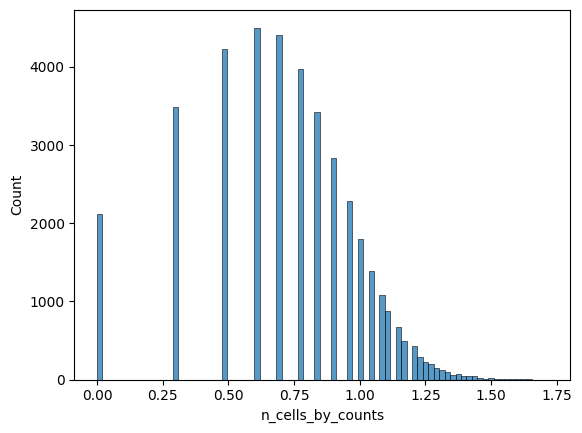

In [26]:
sns.histplot(np.log10(adata.var.n_cells_by_counts))

<AxesSubplot:xlabel='n_genes_by_counts', ylabel='Count'>

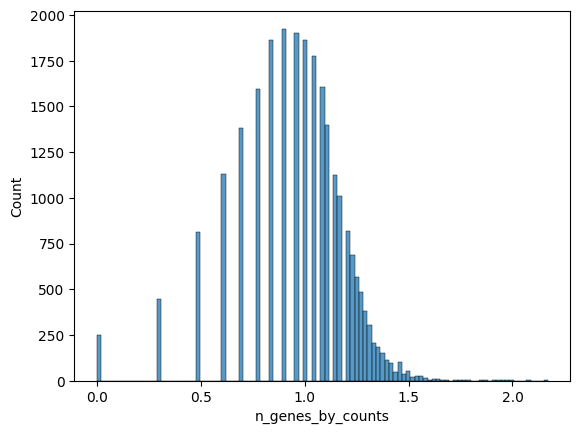

In [27]:
sns.histplot(np.log10(adata.obs.n_genes_by_counts))

<AxesSubplot:xlabel='n_counts', ylabel='Count'>

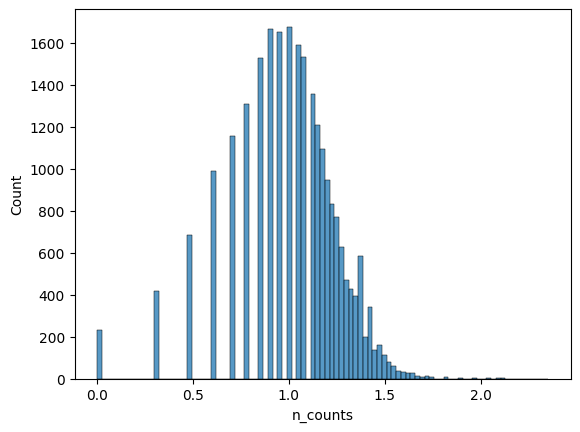

In [28]:
sns.histplot(np.log10(adata.obs.n_counts))

In [29]:
adata

AnnData object with n_obs × n_vars = 24448 × 39472
    obs: 'n_counts', 'n_genes_by_counts', 'total_counts'
    var: 'n_counts', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [212]:
gene='CAATTCAGAGCCAC'

In [213]:
dd=counts_df[counts_df[:,gene].X>0,gene].X.todense()

In [215]:
vals=np.array([np.log10(d[0]) for d in dd.tolist()])

In [216]:
vals.shape

(550,)

<AxesSubplot:ylabel='Count'>

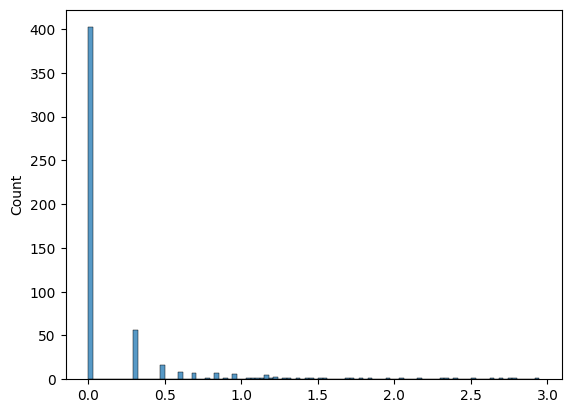

In [217]:
sns.histplot(vals,bins=100)

<AxesSubplot:xlabel='n_cells_by_counts', ylabel='Count'>

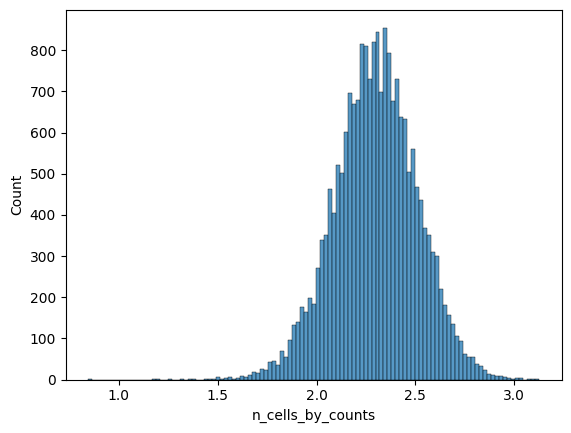

In [144]:
sns.histplot(np.log10(counts_df.var.n_cells_by_counts))

In [132]:
set(counts_df.var.index) & set(counts_df.obs.index)

{'ACCTTCCACTAGCC', 'TAAGCGACATCCCT'}

In [137]:
counts_df.obs.loc['ACCTTCCACTAGCC']

n_counts             775.0
n_genes_by_counts    101.0
total_counts         775.0
Name: ACCTTCCACTAGCC, dtype: float64

In [138]:
counts_df.obs.loc['TAAGCGACATCCCT']

n_counts             815.0
n_genes_by_counts    178.0
total_counts         815.0
Name: TAAGCGACATCCCT, dtype: float64

In [139]:
counts_df.var.loc['TAAGCGACATCCCT']

n_counts                 1087.000000
n_cells_by_counts         163.000000
mean_counts                 0.041474
pct_dropout_by_counts      99.378076
total_counts             1087.000000
Name: TAAGCGACATCCCT, dtype: float64

In [140]:
counts_df.var.loc['ACCTTCCACTAGCC']

n_counts                 765.000000
n_cells_by_counts        224.000000
mean_counts                0.029188
pct_dropout_by_counts     99.145332
total_counts             765.000000
Name: ACCTTCCACTAGCC, dtype: float64

In [135]:
counts_df.var.loc['TAAGCGACATCCCT']

n_counts                 1087.000000
n_cells_by_counts         163.000000
mean_counts                 0.041474
pct_dropout_by_counts      99.378076
total_counts             1087.000000
Name: TAAGCGACATCCCT, dtype: float64

In [122]:
counts_df.obs.index=counts_df.obs.index+'-1'

In [367]:
#counts_df.write_h5ad('/n/scratch3/users/m/meb521/revio_s2/adata_raw.h5ad')

In [421]:
sub[sub['TTGTTAATGTCATG']>0]

bc,GGGCATCGTATACA,ATTCAGGGACAACT,CAAAGGTTACATTC,TTGTTAATGTCATG,TTTATGATTCTCTC
bc,,,,,
ACGCCCTAACCTAA,0.0,0.0,0.0,1.0,0.0
CCGACATGAAGGGA,0.0,0.0,0.0,1.0,0.0
CTACCCTTCCCATT,0.0,0.0,0.0,4.0,0.0
TATACTAAGCGTGC,0.0,0.0,0.0,2.0,0.0
TCCCGTAACCAACG,0.0,0.0,0.0,63.0,0.0
ACCGGCTTCACGCA,0.0,0.0,0.0,1.0,0.0
ATACCTGAGACGCA,0.0,0.0,0.0,1.0,0.0
GTTATCCCATTAAG,0.0,0.0,0.0,1.0,0.0
GTAATACTGCATAT,0.0,0.0,0.0,1.0,0.0


In [385]:
data_agg['TTGTTAATGTCATG']

[['GCCTTTCA', 'ACCGGCTTCACGCA'],
 ['GGGTAGAG', 'TCCCGTAACCAACG'],
 ['TTATACTA', 'TCCCGTAACCAACG'],
 ['GCCTTTCG', 'CACCTACTATTTAG'],
 ['CCGTGTGG', 'TCCCGTAACCAACG'],
 ['GGCCGTAC', 'CACCGCCCAGTGGG'],
 ['CCGTAGGG', 'CTACCCTTCCCATT'],
 ['GGGAGCAG', 'TCCCGTAACCAACG'],
 ['ATTGCGCC', 'GCGAGTCGGATCAG'],
 ['GGGTGGGG', 'CTACCCTTCCCATT'],
 ['GCCTTTCA', 'ACCGGCTTCACGCA'],
 ['GTTTCGCG', 'TCCCGTAACCAACG'],
 ['GCCTTTCA', 'ACCGGCTTCACGCA'],
 ['AACAGGCG', 'GTGGAACAGAAGGG'],
 ['CCGTTTTG', 'TATCTTATAACGGG'],
 ['ATTCCGCG', 'GGAAATAAAGGGTT'],
 ['CCAACTGG', 'CACCTACTATTTAG'],
 ['GCGCAGCG', 'ATACCTGAGACGCA'],
 ['TTTGCCGG', 'CCTTCGCGAGGAGA'],
 ['CTTGCGGA', 'TCCCGTAACCAACG'],
 ['TCCGGCTG', 'CTGACACCATCTCA'],
 ['GTCCGCTA', 'TCCGGCGATGTAAG'],
 ['GGCCGTAC', 'CACCGCCCAGTGGG'],
 ['GATCGCGC', 'TCCCGTAACCAACG'],
 ['GGGGCCGC', 'CACCTACTATTTAG'],
 ['CCCGCTCG', 'TCCCGTAACCAACG'],
 ['ATTGCGCC', 'GCGAGTCGGATCAG'],
 ['TAGGGGGC', 'TCCCGTAACCAACG'],
 ['TGCACGCA', 'TCCCGTAACCAACG'],
 ['CCTCCGCA', 'GCACCATGTTACTA'],
 ['ATTCTCG

In [ ]:
all_list

<AxesSubplot:ylabel='Count'>

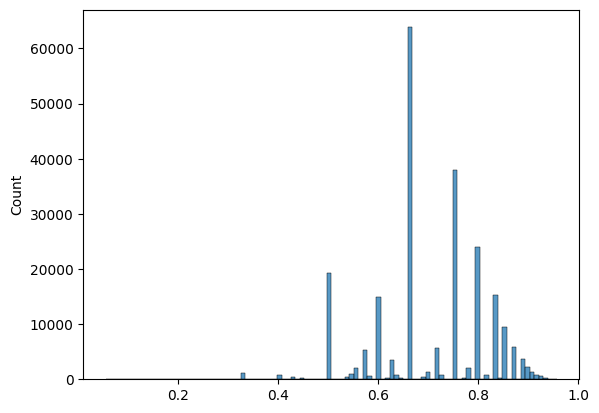

In [334]:
sns.histplot(all_list,bins=100)

In [256]:
umi_tbc_dedup=np.unique(umi_tbc,axis=0)

In [257]:
umi_tbc_dedup

array([['AAAAACCG', 'AGGTACTGTATTAA'],
       ['AAAAACGG', 'CTTTACGAGGCATT'],
       ['AAAACCGA', 'GGTGCGAGGCTTGC'],
       ...,
       ['TTTTTCGG', 'GACAAGAAATGTAC'],
       ['TTTTTTTT', 'CTTTACGAGGCATT'],
       ['TTTTTTTT', 'GACAAGAAATGTAC']], dtype='<U14')

In [258]:
for a in a_white.index[:4]:
    #umi_cnt=a_white.loc['AAACCACGTTTCTT'].umi_cnt

    umi_tbc=np.array(data_agg[a])
    umi_tbc_dedup=np.unique(umi_tbc,axis=0)
    bc_umi_cnt=sort_cnt(umi_tbc_dedup[:,1])
    bc_umi_cnt['cumsum']=bc_umi_cnt[1].cumsum()

    total=bc_umi_cnt['cumsum'].iloc[-1]

    print(bc_umi_cnt[bc_umi_cnt['cumsum']<(.9*total)].shape)
    #for a in a_white.index[:1]:
    #umi_cnt=a_white.loc['AAACCACGTTTCTT'].umi_cnt

    #umi_tbc=np.array(data_agg[a])
    #bc_umi_cnt['log10_umi']=np.log10(bc_umi_cnt[1])
    #plt.figure(figsize=(4,3))
    #log10_ranks=np.log10(np.arange(1,len(bc_umi_cnt)+1))
    #log10_cnts=bc_umi_cnt.log10_umi
    #plt.plot(log10_ranks,log10_cnts)#,label='Rank Plot of Reads')

(211, 3)
(152, 3)
(591, 3)
(847, 3)


In [198]:
umi_tbc_dedup.shape

(13076, 2)

In [203]:
bc_umi_cnt=sort_cnt(umi_tbc_dedup[:,1])

In [210]:
bc_umi_cnt=sort_cnt(umi_tbc[:,1])

In [212]:
bc_umi_cnt['log10_umi']=np.log10(bc_umi_cnt[1])

In [215]:
bc_umi_cnt.log10_umi

806    4.076895
850    3.426999
38     3.401228
328    3.246252
599    3.128399
         ...   
582    0.000000
584    0.000000
586    0.000000
589    0.000000
629    0.000000
Name: log10_umi, Length: 1259, dtype: float64

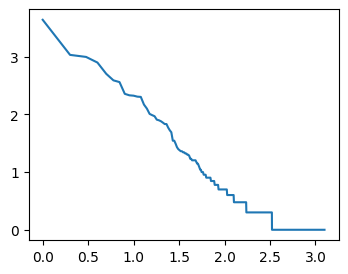

In [207]:
plt.figure(figsize=(4,3))
log10_ranks=np.log10(np.arange(1,len(bc_umi_cnt)+1))
log10_cnts=bc_umi_cnt.log10_umi
plt.plot(log10_ranks,log10_cnts)#,label='Rank Plot of Reads')

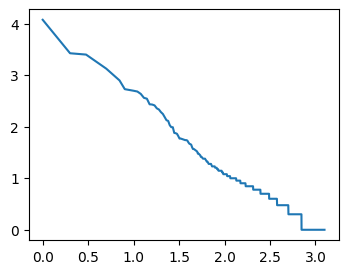

In [214]:
plt.figure(figsize=(4,3))
log10_ranks=np.log10(np.arange(1,len(bc_umi_cnt)+1))
log10_cnts=bc_umi_cnt.log10_umi
plt.plot(log10_ranks,log10_cnts)#,label='Rank Plot of Reads')

In [373]:
4**8

65536

In [372]:
print_counts=True
for a in a_white.index[:2]:
    #umi_cnt=a_white.loc['AAACCACGTTTCTT'].umi_cnt

    umi_tbc=np.array(data_agg[a])

    bb=sort_cnt(pd.DataFrame(umi_tbc)[1])

    umi_df=pd.DataFrame(umi_tbc)
    
    umi_cnt=umi_df[0].unique().shape[0]
    print(10*'-'+'anchor barcode='+a+'---total umis='+str(umi_cnt))

    for b in bb[0].iloc[:10]:
        if print_counts:
            print(10*'-'+b+10*'-')

        bc_umi=umi_df[umi_df[1]==b][0].value_counts()
        rep_umi=bc_umi[bc_umi>1]
        n_umi_rep=rep_umi.shape[0]
        n_noncord=0
        for u in rep_umi.index:
            rep_bc=umi_df[umi_df[0]==u][1].value_counts()
            if print_counts:
                print(u)
                print(rep_bc)
            if rep_bc.shape[0]>1:
                #n_noncord+=rep_bc.shape[0]-1
                n_noncord+=1
        print(5*'-'+'target bc='+b+'--- n_umis>1read = '+str(n_umi_rep)+'--- n nonconcordant umis='+
              str(n_noncord)+5*'-')

----------anchor barcode=TTAATCGATGTCAG---total umis=11328
----------GGGTAAATGCCTTA----------
CGCAGGGG
GGGTAAATGCCTTA    14
ATCAATAGCCTGTA     4
TGGTCCGTATAAAA     2
Name: 1, dtype: int64
GACAAACC
GGGTAAATGCCTTA    14
Name: 1, dtype: int64
GGTTCCGA
GGGTAAATGCCTTA    12
Name: 1, dtype: int64
GGGAGTCG
GGGTAAATGCCTTA    12
Name: 1, dtype: int64
GGGTCCCG
GGGTAAATGCCTTA    11
Name: 1, dtype: int64
GGCAAAGA
GGGTAAATGCCTTA    11
Name: 1, dtype: int64
GTCTACCA
GGGTAAATGCCTTA    11
Name: 1, dtype: int64
TTGTATGG
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
TACCCCTG
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
TTGGCGCG
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
GTAATGGC
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
CGGGGAAC
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
AGGCTTCG
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
GCACGGCG
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
AGTCTGTA
GGGTAAATGCCTTA    10
Name: 1, dtype: int64
CCCCTCTC
GGGTAAATGCCTTA    9
AGCCCTACGTAGCG    2
Name: 1, dtype: int64
CACAGCCA
GGGT

In [369]:
read_dict={}
umi_dict={}
total_reads=0
for k in tqdm(data_agg):
    reads=len(data_agg[k])
    total_reads+=reads
    if reads>=5:
        read_dict[k]=reads
        umi_dict[k]=len(set(data_agg[k]))

100%|██████████| 6701607/6701607 [00:13<00:00, 493572.07it/s] 


In [380]:
umi_cnt=pd.Series(umi_dict)
read_cnt=pd.Series(read_dict)

In [381]:
read_cnt

TNTTCTCTGAACCT       5
CGAGCCTTGTTTCT    4372
TTTGGCTGTCCTTG    3701
GTGGAACAAGGAAT    7030
GAAGCAAAATACAC      15
                  ... 
GACTTAATTACGTG       5
GTTTGCACCACAAT       5
AGCAAGCTTAGAAG       6
CGGGCCCTCGTCGA       5
TATTAATACCGCCT       5
Length: 678324, dtype: int64

In [12]:
read_cnt=pd.read_csv(f'{indir}/{sample}/{sample}_agg_read_cnt_{position}.csv')

umi_cnt=pd.read_csv(f'{indir}/{sample}/{sample}_agg_umi_cnt_{position}.csv')


umi_cnt.columns=['bc','umi_cnt']
read_cnt.columns=['bc','read_cnt']
agg_bcs=pd.merge(umi_cnt,read_cnt,left_on='bc',right_on='bc',how='inner')
agg_bcs['log10_read_cnt']=np.log10(agg_bcs['read_cnt'])
agg_bcs['log10_umi_cnt']=np.log10(agg_bcs['umi_cnt'])
agg_bcs['dup_rate']=agg_bcs['read_cnt']/agg_bcs['umi_cnt']
agg_bcs=agg_bcs.sort_values(by='umi_cnt',ascending=False)

In [ ]:
sub=merge[(merge.dup_rate<1.6) & (merge.dup_rate>1.2) & (merge.umi_cnt>10**2.7)].copy()

plt.figure(figsize=(3,3))
sns.scatterplot(data=sub,x='log10_read_cnt',y='dup_rate',s=.4)

plt.figure(figsize=(3,2))
sns.histplot(data=agg_bcs,x='log10_umi_cnt',bins=100)

In [18]:
sub=agg_bcs.iloc[20:100000].copy()

x = np.histogram(sub.log10_umi_cnt, 100)

#x = np.histogram(agg_bcs.iloc[20:100000].log10cnt, 100) # select top 100k bc except first 20
smooth = gaussian_filter1d(x[0], 3)
peak_idx,_=find_peaks(-smooth)
print(peak_idx,x[1][:-1][peak_idx])
mean_hist=(x[1][1:][peak_idx]+x[1][:-1][peak_idx])/2
mean_hist=mean_hist[0]

wl_df=agg_bcs[agg_bcs.log10_umi_cnt>=mean_hist].copy()

wl_df.to_csv(f'{indir}/{sample}/{sample}_{position}_wl.csv.gz',compression='infer')

In [20]:
wl_reads=wl_df.read_cnt.sum()

white_list_size=wl_df.shape[0]

#print(f'{sample} {position}\n{np.sum(total_reads)/1e6}m raw reads\n{wl_reads/1e6}m reads in whitelist')

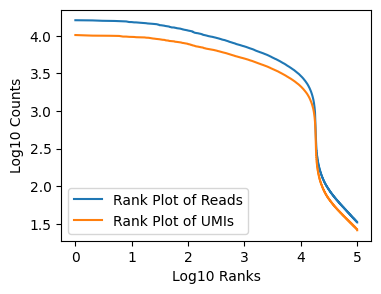

In [303]:
plt.figure(figsize=(4,3))
agg_bcs=agg_bcs.sort_values(by='read_cnt',ascending=False)
sub=agg_bcs.iloc[20:100000]
log10_ranks=np.log10(np.arange(1,len(sub)+1))
log10_cnts=sub.log10_read_cnt
plt.plot(log10_ranks,log10_cnts,label='Rank Plot of Reads')

agg_bcs=agg_bcs.sort_values(by='umi_cnt',ascending=False)
sub=agg_bcs.iloc[20:100000]
log10_ranks=np.log10(np.arange(1,len(sub)+1))
log10_cnts=sub.log10_umi_cnt
plt.plot(log10_ranks,log10_cnts,label='Rank Plot of UMIs')
plt.xlabel('Log10 Ranks')
plt.ylabel('Log10 Counts')
plt.legend(loc="best");

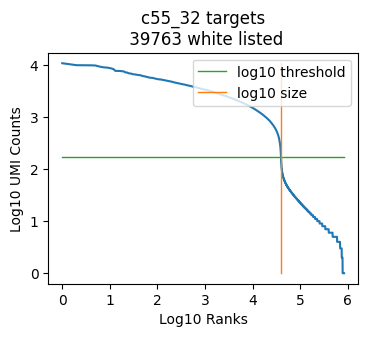

In [22]:
plt.figure(figsize=(4,3))
log10_ranks=np.log10(np.arange(1,len(agg_bcs)+1))
log10_cnts=agg_bcs.log10_umi_cnt
plt.plot(log10_ranks,log10_cnts)#,label='Rank Plot of Reads')
plt.xlabel('Log10 Ranks')
plt.ylabel('Log10 UMI Counts')
plt.title(f'{sample} {position}\n {white_list_size} white listed')
plt.plot([0, log10_ranks[-1]], [mean_hist, mean_hist], linewidth=1,label='log10 threshold',c='tab:green')
log10_wl=np.log10(white_list_size)
plt.plot([log10_wl, log10_wl], [log10_cnts.min(), log10_cnts.max()], linewidth=1,label='log10 size',c='tab:orange')
plt.legend(loc="upper right");
plt.savefig(f'{indir}/{sample}/{sample}_{position}_rankplot.pdf',bbox_inches='tight');
#plt.savefig(f'{sample}_{position}_rankplot.pdf',bbox_inches='tight');
#plt.close()

In [339]:
print(f'{inputdir}/{sample}/{sample}_{position}_rankplot.pdf')

/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_32/c55_32_anchors_rankplot.pdf


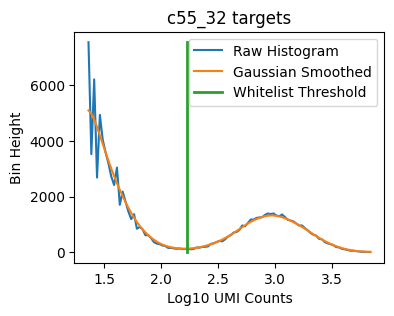

In [23]:
plt.figure(figsize=(4,3))
plt.plot(x[1][:-1],x[0], label='Raw Histogram')
plt.plot(x[1][:-1],smooth, label='Gaussian Smoothed')
plt.xlabel('Log10 UMI Counts')
plt.ylabel('Bin Height')
plt.title(f'{sample} {position}')
plt.plot([mean_hist, mean_hist], [0, np.max(x[0])], linewidth=2,label='Whitelist Threshold')
plt.legend(loc="upper right");
#plt.savefig(f'{inputdir}/{sample}/{sample}_{position}_histogram.pdf',bbox_inches='tight');
#plt.close()

In [25]:
mean

1.3922975625041143

In [28]:
np.linspace(mean-width,mean+width,7)

array([1.16958071, 1.24381966, 1.31805861, 1.39229756, 1.46653651,
       1.54077546, 1.61501441])

In [29]:
mean

1.3922975625041143

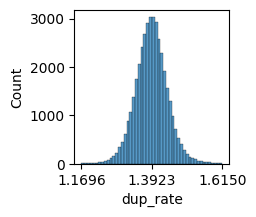

In [38]:
plt.figure(figsize=(2,2))
mean=wl_df.dup_rate.mean()
n_std=3
width=wl_df.dup_rate.std()*n_std
ticks=np.linspace(mean-width,mean+width,3)
sns.histplot(wl_df[(wl_df.dup_rate>mean-width) & (wl_df.dup_rate<mean+width) ].dup_rate,bins=50)
plt.xticks(ticks)
plt.savefig(f'{sample}_{position}_duprate.pdf',bbox_inches='tight');

In [33]:
ticks

array([1.16958071, 1.24381966, 1.31805861, 1.39229756, 1.46653651,
       1.54077546, 1.61501441])

In [36]:
ticks=np.linspace(mean-width,mean+width,3)

In [37]:
ticks

array([1.16958071, 1.39229756, 1.61501441])

In [357]:
plt.figure(figsize=(2,2))
sns.histplot(agg_bcs[(merge.dup_rate>1.2) & (merge.dup_rate<1.6) & (agg_bcs.umi_cnt>400)].dup_rate,bins=100)

plt.figure(figsize=(2,2))
mean=wl_df.dup_rate.mean()

width=wl_df.dup_rate.std()*3

sns.histplot(wl_df[(wl_df.dup_rate>mean-width) & (wl_df.dup_rate<mean+width) ].dup_rate,bins=100)

In [41]:
pd.read_csv(f'{indir}/{sample}/{sample}_{position}_wl.csv.gz')['bc']#,compression='infer')

0        TGATGATCTTAGTT
1        ACCGGAGGTCCAAT
2        TATGCCGGGGTGGG
3        TACGCACCCGTCTC
4        AGTAAACTCCGGAA
              ...      
39758    GGTGTCCCGTACAA
39759    AGGTATCAAGTGCT
39760    AACGCTTTTACTAT
39761    ATTGTTAGAAGGTG
39762    CCCGGGGTACGCGA
Name: bc, Length: 39763, dtype: object

# json merge from bc_umi_dict extract first threshold

In [5]:
dir_split='/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_32/split/'

In [6]:
files=os.listdir(dir_split)

In [9]:
position='anchors'

In [11]:
jsons = sorted([f for f in files if f'{position}.json' in f])

In [98]:
all_jsons = {}

In [103]:
all_cnt = []

for i in tqdm(range(len(jsons))):
    with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
        data_new = json.load(json_file)
        
        bc_dict={}
        for k in data_new:
            bc_dict[k]=len(data_new[k])
        
        cnt=pd.Series(bc_dict)
        
        all_cnt.append(cnt[cnt>5])
        

100%|██████████| 16/16 [02:33<00:00,  9.57s/it]


In [203]:
all_cnt_cat=pd.concat(all_cnt)

In [204]:
all_cnt_cat=all_cnt_cat.reset_index()

In [205]:
all_cnt_cat=all_cnt_cat.groupby('index').sum()

In [206]:
all_cnt_cat=all_cnt_cat.reset_index()

In [207]:
all_cnt_cat.columns=['a_bc','cnt']

In [208]:
all_cnt_cat=all_cnt_cat.sort_values(by='cnt',ascending=False)

In [209]:
all_cnt_cat['log10cnt']=np.log10(all_cnt_cat.cnt)

In [213]:
sub=all_cnt_cat[all_cnt_cat.log10cnt>2].copy()

In [214]:
sub

,a_bc,cnt,log10cnt
568,AAACCACGTTTCTT,33318,4.522679
67844,TAGCTTCCTCGCCG,28681,4.457594
83434,TTCGTAGAAAGTCC,23498,4.371031
25651,CAATGTCCGAACAT,22124,4.344864
18632,ATACCATGTAGATA,21977,4.341968
...,...,...,...
8395,ACATGGCGCTTCAC,101,2.004321
82364,TTCAACATCCCCCG,101,2.004321
82097,TTATCATTTGACTG,101,2.004321
50954,GCCAAATTAGACTG,101,2.004321


<AxesSubplot:xlabel='log10cnt', ylabel='Count'>

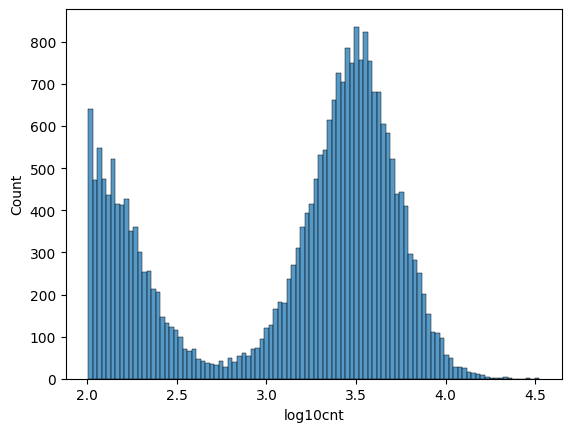

In [215]:
sns.histplot(sub.log10cnt,bins=100)

In [217]:
sub.to_csv(f'{dir_split}/merged_white.csv',index=None)

In [234]:
sub=pd.read_csv(f'{dir_split}/merged_white.csv',index_col=0)

data_agg={}

for bc in sub.index:
    data_agg[bc]=[]

In [235]:
len(data_agg)

25712

In [236]:
for i in tqdm(range(len(jsons))):
#for i in tqdm(range(2)):
    with open(f'{dir_split}{jsons[i]}', 'r') as json_file:
        data_sub = json.load(json_file)
        
        for k in data_agg:
            if data_sub.get(k) is not None:
                data_agg[k].extend(data_sub[k])

100%|██████████| 16/16 [02:13<00:00,  8.35s/it]


In [ ]:
agg_json=''

In [249]:
str(Path(dir_split).parents[0])

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_32'

'/n/data2/dfci/medonc/cwu/meb521/slideseq/reconstruct/c55_32/dict_agg.json'

In [254]:
json_path=f'{str(Path(dir_split).parents[0])}/dict_agg.json'

In [255]:
with open(json_path, 'w') as json_file:
    json.dump(data_agg, json_file)

In [256]:

bc_dict={}
for k in tqdm(data_agg):
    bc_dict[k]=len(data_agg[k])

cnt=pd.Series(bc_dict)  

100%|██████████| 25712/25712 [00:00<00:00, 765431.53it/s]


In [260]:
cnt.head(20)

AAACCACGTTTCTT    33318
TAGCTTCCTCGCCG    28681
TTCGTAGAAAGTCC    23498
CAATGTCCGAACAT    22124
ATACCATGTAGATA    21977
CTCTTCTAGCTCTA    21651
TCAAGTTACGATGA    20226
CTACTTAATCTCCA    19906
AAATCCTTCATGCC    19751
CTAACGACCACATA    18909
CTTCGCAATAAGGT    17862
CTGTTATTCAGCCC    17604
TATTTAATGAGCCC    17236
TGAAGGTTCGACAG    17006
TCAAGCTGCATTGA    16786
TGCAGCAAATTGCA    16693
TTGGACTTTGCTTT    16456
TATACTGTCGCGCA    16413
TAATGCCGAGCTAT    16340
TATCAGATTAGAAT    16142
dtype: int64

In [259]:
sub.head(20)

,cnt,log10cnt
a_bc,,
AAACCACGTTTCTT,33318,4.522679
TAGCTTCCTCGCCG,28681,4.457594
TTCGTAGAAAGTCC,23498,4.371031
CAATGTCCGAACAT,22124,4.344864
ATACCATGTAGATA,21977,4.341968
CTCTTCTAGCTCTA,21651,4.335478
TCAAGTTACGATGA,20226,4.305910
CTACTTAATCTCCA,19906,4.298984
AAATCCTTCATGCC,19751,4.295589


In [116]:
anchors=pd.read_csv(f'{recon_dir}outs/c55_4_anchors_wl.csv.gz', compression='gzip')

In [198]:
anchors=pd.read_csv(f'{recon_dir}outs/c55_32_anchors_wl.csv.gz', compression='gzip')

In [173]:
merge=pd.merge(anchors,all_cnt_cat,left_on='a_bc',right_on='a_bc',how='inner')

In [175]:
merge['log10cnt_quad']=np.log10(merge['cnt_y'])

In [176]:
import seaborn as sns

In [178]:
merge

,a_bc,cnt_x,log10cnt,cnt_y,log10cnt_quad
0,TAGCTTCCTCGCCG,46148,4.664153,28681,4.457594
1,AAACCACGTTTCTT,44370,4.647089,33318,4.522679
2,GATAAATCCACACT,39750,4.599337,14239,4.153479
3,ATACCATGTAGATA,37444,4.573382,21977,4.341968
4,CAATGTCCGAACAT,34898,4.542801,22124,4.344864
...,...,...,...,...,...
18466,AAAAAGACAAGCTG,1060,3.025306,22,1.342423
18467,TCCCGGCAAGTGGT,1058,3.024486,495,2.694605
18468,GACCCGCGAGGTAT,1054,3.022841,476,2.677607
18469,TGCGAGCGCGTTAA,1051,3.021603,642,2.807535


<AxesSubplot:xlabel='log10cnt_quad', ylabel='log10cnt'>

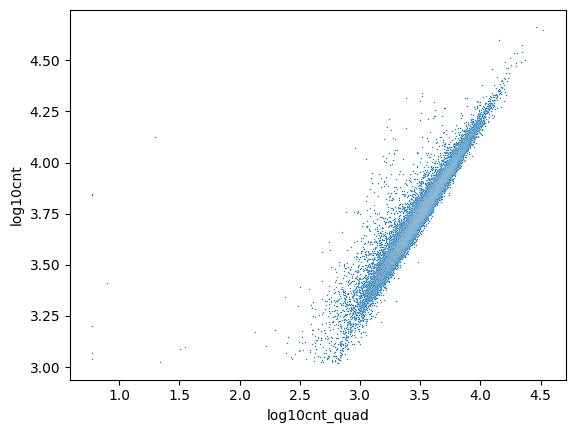

In [179]:
sns.scatterplot(data=merge,x='log10cnt_quad',y='log10cnt',s=1)